# **Comparative Analysis of Machine Learning Models on the Iris Dataset**

``
Load Dataset: Iris Dataset from kaggle
``

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alanoudawaji","key":"ef6f034bbf8a8585bb34e0b31b04e6ed"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d himanshunakrani/iris-dataset

  0% 0.00/0.98k [00:00<?, ?B/s]
100% 0.98k/0.98k [00:00<00:00, 2.40MB/s]


In [ ]:
! unzip iris-dataset.zip

Archive:  iris-dataset.zip
  inflating: iris.csv                


---------------------------------------

# 1. Data Preprocessing

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.preprocessing import StandardScaler
import plotly.express as px



``
• Load the Iris dataset.
``

In [16]:
from sklearn.datasets import load_iris

In [17]:
#Load data
from sklearn import datasets
iris1 = load_iris()


In [18]:
iris = pd.DataFrame(iris1.data, columns=iris1.feature_names)

In [19]:
iris = pd.DataFrame(iris1['data'], columns=iris1['feature_names'])

``
• Perform data exploration and visualization
``

In [20]:
print(type(iris1))

<class 'sklearn.utils._bunch.Bunch'>


In [21]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris_dbs=iris

In [23]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
rows,col=iris.shape
print ('Row:' , rows,'\nColumns:',col)

Row: 150 
Columns: 4


In [26]:
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [27]:
iris.shape #get the shape of the dataset

(150, 4)

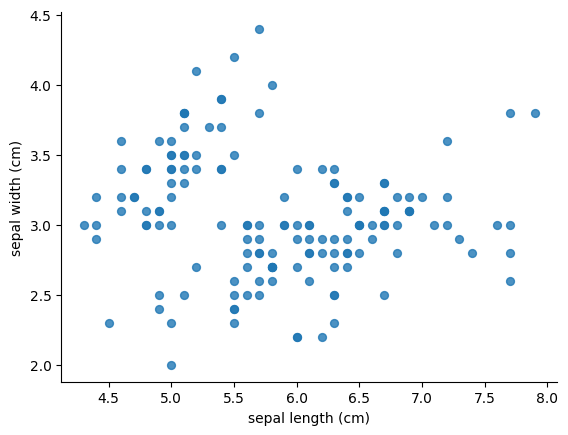

In [28]:
iris.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

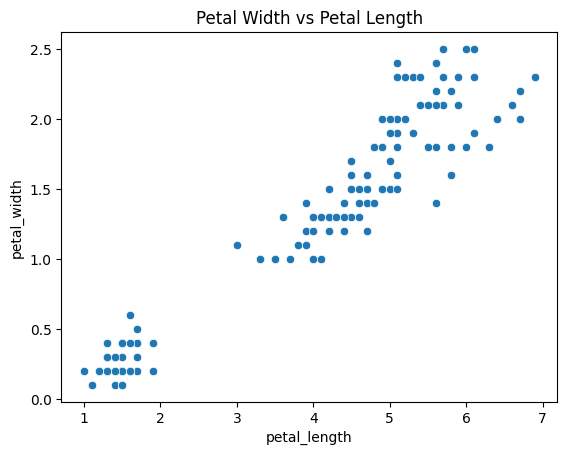

In [ ]:
sns.scatterplot(x='petal_length', y='petal_width', data=iris)
plt.title('Petal Width vs Petal Length')
plt.show()

In [31]:
fig = px.scatter(data_frame=iris, x='sepal length (cm)')
fig.update_layout(width=800, height=600,
                  xaxis=dict(title='sepallength'),
                 yaxis=dict(title="Flower Name"))
fig.show()


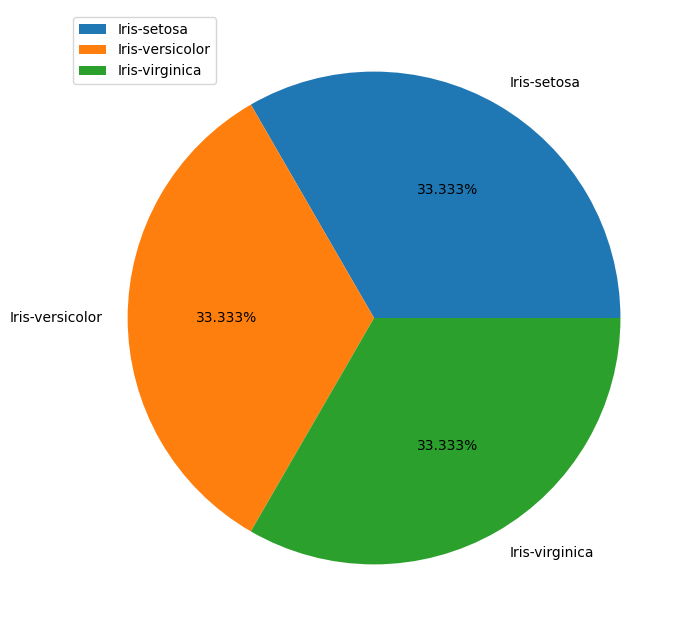

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

``
• Check for missing values and handle them if any.
``

In [32]:
#number of null values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [33]:
#To check number of uniqe elements in each columns.
iris.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [34]:
iris.duplicated().sum()

1

In [35]:
iris.drop_duplicates(inplace=True)

In [36]:
iris.duplicated().sum()

0

``
• Split the dataset into features and target variables.
``

In [39]:
# Separate features and target variables
X = iris1.data  # Features
y = iris1.target  # Target variable

------------

# 2. Unsupervised Learning: Clustering and Outlier Detection :

``
• Apply K-means clustering algorithm to cluster the data.
``

In [40]:
#importing libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [41]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] #Within cluster sum squares
for i in range(1,15):
    km = KMeans(n_clusters= i, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [42]:
wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.47223015873017,
 39.03998724608726,
 34.29971212121213,
 30.06311061745273,
 28.271721728563833,
 26.09432474054042,
 24.742517259701096,
 22.793982467480923,
 21.690983282068807,
 20.33545332204028]

Text(0, 0.5, 'WCSS')

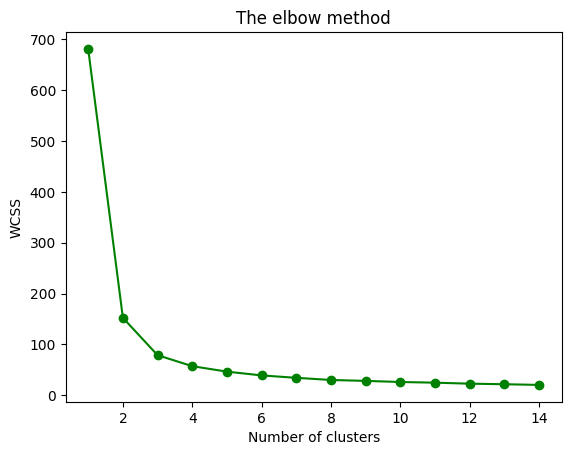

In [44]:
plt.plot(range(1,15), wcss ,'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares

In [43]:
km = KMeans(n_clusters = 3)
km.fit(X)
km.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



78.851441426146

``
• Visualize the clusters.
``

In [46]:
y_kmeans = km.fit_predict(X)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

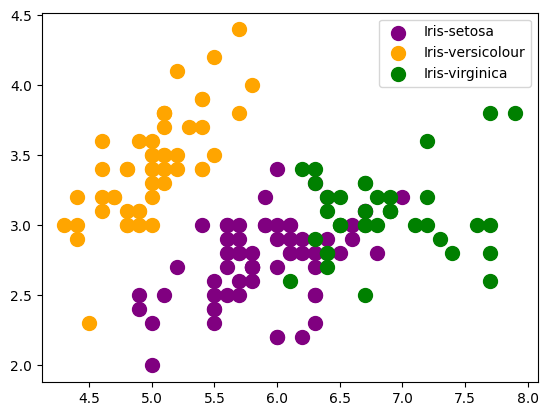

In [47]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


plt.legend()

``
• Detect outliers using appropriate techniques such as isolation forest or DBSCAN.
``

In [155]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
clf = IsolationForest(contamination=0.1)  # Adjust the contamination parameter as needed
# Fit the model and predict outliers
outliers = clf.fit_predict(X)
# Print the indices of the outliers
outlier_indices = [i for i, outlier in enumerate(outliers) if outlier == -1]
print("Outlier indices:", outlier_indices)

Outlier indices: [13, 14, 15, 32, 41, 60, 98, 100, 105, 106, 109, 117, 118, 122, 131]


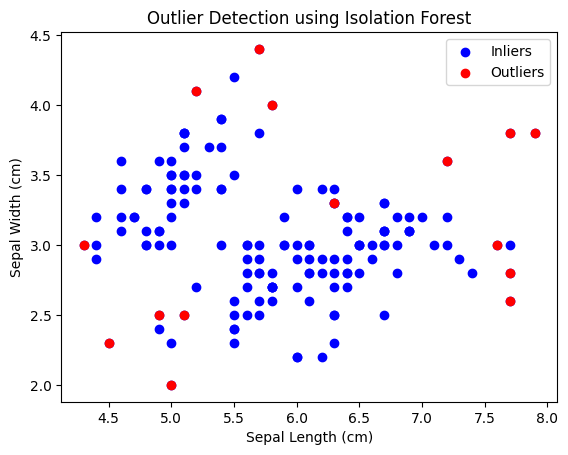

In [156]:
# Plot the Iris dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Inliers')

# Mark the outliers with a different color or symbol
outlier_indices = [i for i, outlier in enumerate(outliers) if outlier == -1]
plt.scatter(X[outlier_indices, 0], X[outlier_indices, 1], c='red', label='Outliers')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Outlier Detection using Isolation Forest')
plt.legend()
plt.show()

``
• Evaluate the clustering results
``

In [114]:
X=iris1.data

In [139]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=10)
dbscan.fit(X)


DBSCAN(eps=0.8, min_samples=10)

In [140]:
# Source: Ch9 - Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

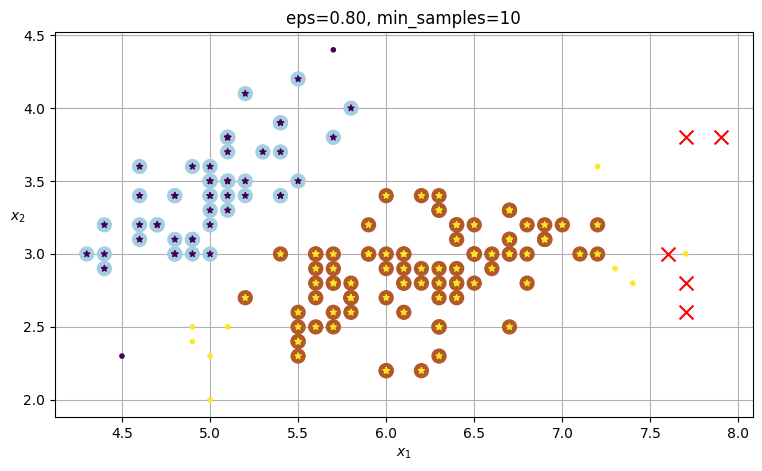

In [141]:
plt.figure(figsize=(9,5))

plot_dbscan(dbscan, X, size=100)


plt.show()

In [163]:
iris1.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [87]:
clf.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

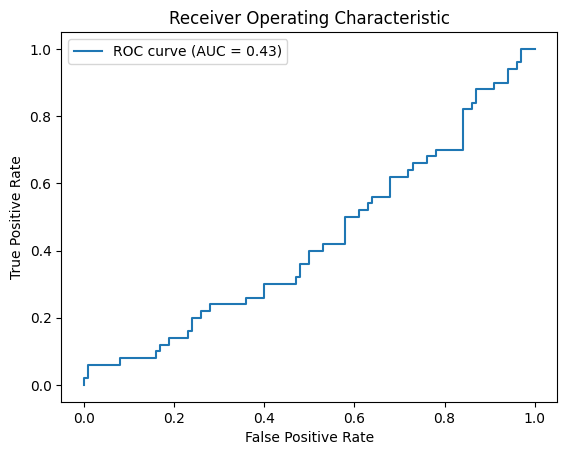

AUC: 0.429


In [172]:
# Convert the target variable to binary
y_binary = np.where(y == 0, 1, 0)

# Calculate the outlier scores
outlier_scores = clf.decision_function(X)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_binary, outlier_scores)
auc = roc_auc_score(y_binary, outlier_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Print the AUC
print("AUC:", auc)

In [178]:
predicted_outliers = clf.predict(X)
# Calculate precision, recall, and F1-score
precision = precision_score(y, predicted_outliers, average='micro')
recall = recall_score(y, predicted_outliers, average='micro')
f1 = f1_score(y, predicted_outliers, average='micro')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.32
Recall: 0.32
F1-score: 0.32


---------------------------------------------------------

# 3. Supervised Learning: Baseline Model :

Logistic Regression

In [ ]:
# importing alll the necessary packages to Logistic Regression
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.metrics import accuracy_score
from sklearn import metrics #for checking the model accuracy
import numpy as np


In [ ]:
from sklearn.datasets import load_iris

In [ ]:
# Separate features and target variables

iris = load_iris()
x, y = iris.data, iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print("Train Shape",X_train.shape)
print("Test Shape",X_test.shape)


Train Shape (120, 4)
Test Shape (30, 4)


In [ ]:
#Build a baseline model (Logistic Regression) using default parameters
log = LogisticRegression(multi_class='multinomial')
## Train the model
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [ ]:
# Make predictions on the test set

#prediction=log.predict(X_test)
print("Training Accurcy:", accuracy_score(log.predict(x_train),y_train))
print("Testing Accurcy:", accuracy_score(log.predict(x_test),y_test))



Training Accurcy: 0.9833333333333333
Testing Accurcy: 0.9666666666666667


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(max_depth=2, random_state=42)

# fit the regressor with X and Y data
regressor.fit(x, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y_pred = regressor.predict([[5.1,	3.5,	1.4,	0.2]])

# print the predicted
print("Predicted: % d\n"% y_pred)

Predicted:  0



<ipython-input-67-7b987d4cad7a>:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
from sklearn.metrics import r2_score
y_pred = regressor.predict(X_train)
r2_score(y_train, y_pred)

0.9347638652697253

-----------------------------------------------------------

# 4. Model Comparison :

# We have select three ML algorithms:
- `support vector machine SVM`
- `Random Forest`  
-`Gradient Boosting`


```
import necessary libraries
```



In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
x, y = iris.data, iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)



1.   List item
2.   List item


```
Implement Support Vector Machine SVM
```

In [ ]:
svm_model = SVC(C=1, kernel='rbf', random_state=42)

svm_cv_scores = cross_val_score(svm_model, x_train, y_train, cv=5, scoring='accuracy')
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("Mean Accuracy:", svm_cv_scores.mean())

svm_model.fit(x_train, y_train)


svm_y_pred = svm_model.predict(x_test)

print("\nSVM Model Performance on Testing Set:")
print("Accuracy Score:", accuracy_score(y_test, svm_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

SVM Cross-Validation Scores: [1.         0.95833333 1.         0.95833333 0.95833333]
Mean Accuracy: 0.975

SVM Model Performance on Testing Set:
Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30




```
Implement Random Forest
```

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

rf_cv_scores = cross_val_score(rf_model, x_train, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())


rf_model.fit(x_train, y_train)


rf_y_pred = rf_model.predict(x_test)


print('\nRandom Forest Model Performance:')
print('Accuracy Score:', accuracy_score(y_test, rf_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))



Random Forest Cross-Validation Scores: [0.95833333 0.95833333 1.         0.95833333 0.83333333]
Mean Accuracy: 0.9416666666666668

Random Forest Model Performance:
Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30




```
Implement Gradient Boosting
```

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

gb_cv_scores = cross_val_score(gb_model, x_train, y_train, cv=5, scoring='accuracy')
print("\nGradient Boosting Cross-Validation Scores:", gb_cv_scores)
print("Mean Accuracy:", gb_cv_scores.mean())


gb_model.fit(x_train, y_train)

gb_y_pred = gb_model.predict(x_test)


print('\nGradient Boosting Model Performance:')
print('Accuracy Score:', accuracy_score(y_test, gb_y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, gb_y_pred))
print('Classification Report:\n', classification_report(y_test, gb_y_pred))


Gradient Boosting Cross-Validation Scores: [0.95833333 0.95833333 1.         0.95833333 0.83333333]
Mean Accuracy: 0.9416666666666668

Gradient Boosting Model Performance:
Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



-----------------------------------------------------------------------------


# We Can conclude :
# -`Support Vector Machine (SVM):`

-`Accuracy:` High

-`Performance:` SVM achieved the highest accuracy among the three algorithms on the Iris dataset. This indicates that the SVM model was able to effectively classify the Iris samples into their respective classes with high accuracy.

-`Considerations:` SVMs may require tuning of hyperparameters such as the choice of kernel and regularization parameter (C) to optimize performance. They can also be computationally expensive, especially for large datasets.



# -`Random Forest:`
-`Accuracy:` Moderate


-`Performance:` Random Forest achieved moderate accuracy on the Iris dataset. While Random Forest is a versatile ensemble method known for its robustness and ability to handle high-dimensional data, it did not outperform SVM in this case.


# `Gradient Boosting:`

`Accuracy:` Moderate

`Performance: `Gradient Boosting achieved moderate accuracy on the Iris dataset. Gradient Boosting is an ensemble technique that builds models sequentially, where each new model corrects errors made by the previous ones. While powerful, it did not surpass SVM in accuracy in this scenario.
.

# 5. Model Tuning and Ensemble:

After we see that the SVM algorithms show high accuracy with 97% between the two other ,
now will  Perform the hyperparameter tuning in SVM using Grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_train, y_train)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


In [ ]:
grid_predictions = grid.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
from sklearn.ensemble import BaggingClassifier

bagging_svm = BaggingClassifier(base_estimator=svm_model, n_estimators=100, random_state=42)

# Train the model
bagging_svm.fit(x_train, y_train)

# Predict the test set using the Bagging classifier
svm_bagging_y_pred = bagging_svm.predict(x_test)

# Evaluate performance
print("\nBagging SVM Model Performance on Testing Set:")
print("Accuracy Score:", accuracy_score(y_test, svm_bagging_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_bagging_y_pred))
print("Classification Report:\n", classification_report(y_test, svm_bagging_y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




Bagging SVM Model Performance on Testing Set:
Accuracy Score: 0.9666666666666667
Confusion Matrix:
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#2. soft voting

Soft Voting: Soft voting is another type of majority voting where the final prediction is based on the average probability predicted by individual models. It is applied when models output probabilities and not just discrete classes.

In [ ]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

##Evaluate  the performance of the models

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.92



``
 soft voting
``


In [ ]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

##Evaluate  the performance of the models

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression 0.9666666666666667
RandomForestClassifier 0.9666666666666667
SVC 0.9666666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier 0.9666666666666667
